## Logistic Regression

Credits: Notebook based on A.Géron Hands-On Machine Learning with Scikit-Learn and TensorFlow: Concepts, Tools, and Techniques to Build Intelligent Systems.

Logistic Regression model computes a weighted sum of input feature and outputs the logistic of the results.

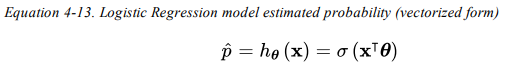



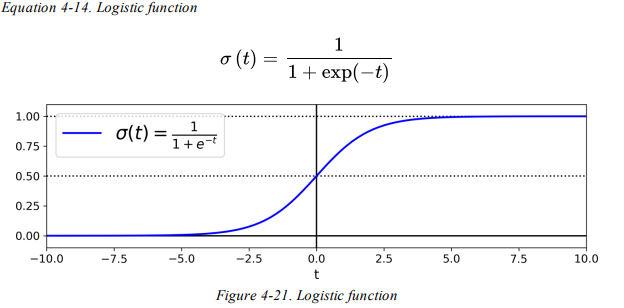

Once the model has estimated the probability of belonging to the positive class, it can make a prediction. Simply if the y is greater/equal 0.5, it should be classified as 1, 0 otherwise

Training: the purpose of training is that the model estimated hihj probabilities for positive instances and low for negative. Training is performed with cost function:



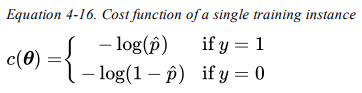



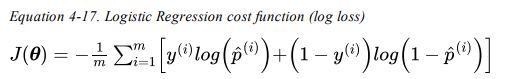

In [88]:
import numpy as np

class LogisticClassifier:

  def __init__(self, lr=1e-4, n_iters=10000):

    self.is_fitted=False
    self.theta=None
    self.n_iters=n_iters
    self.lr=lr


  @staticmethod
  def logistic(X):
    return 1/(1+ np.exp(-X))

  def fit(self,X,y):

    self.is_fitted=True

    n_samples, n_features = X.shape

    self.theta=np.random.randn(n_features+1,1) # plus biased, column vector

    X=np.c_[np.ones((n_samples, 1)), X]

    for iter in range(self.n_iters):

      gradients=(1/n_samples) *X.T.dot(  self.logistic( X.dot( self.theta) )   -y    )
      self.theta-=self.lr*gradients

  def predict(self,X):
    if self.is_fitted:

      X=np.c_[np.ones((X.shape[0], 1)), X]
      dot=X.dot(self.theta)
      return (dot>=0).astype(np.int)
    else:
      print("Model must be fitted before prediction")
  
  def predict_proba(self,X):

    if self.is_fitted:
      X=np.c_[np.ones((X.shape[0], 1)), X]

      return self.logistic( X.dot( self.theta) ) 

    else:
      print("Model must be fitted before prediction")

  

In [89]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from  sklearn.metrics import accuracy_score

iris=datasets.load_iris()

X=iris['data'][:,3:]
y=(iris['target']==2).astype(np.int)
y=y.reshape((-1,1))

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
log_clf = LogisticClassifier(n_iters=1000000)



In [90]:
log_clf.fit(X_train, y_train)

In [63]:
log_clf.theta

array([[-4.79938805],
       [ 3.03543074]])

In [64]:
y_predicted=log_clf.predict(X_val)

In [79]:
accuracy_score(y_predicted,y_val)

0.9666666666666667

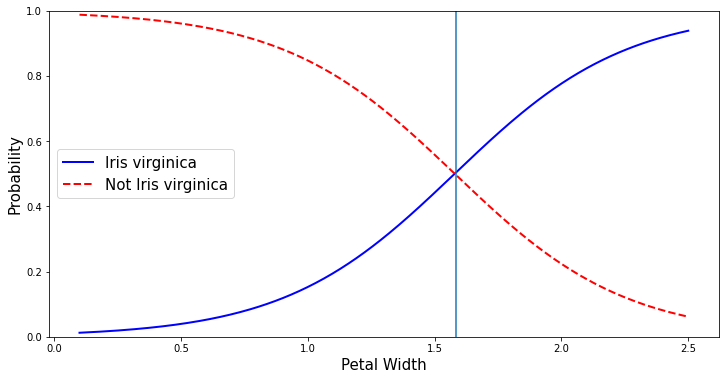

In [58]:
import matplotlib.pyplot as plt

def plot_decision_boundaries(clf,X,labels,linewidth=2,fontsize=15):

  if X.shape[1]==1:

    X_new=np.linspace(X.min(),X.max(),num=len(X)*2 ).reshape(-1, 1)
    y_proba=clf.predict_proba(X_new)
    boundary= X_new[y_proba[:, 0] >= 0.5][0]

    fig = plt.figure(figsize=(12, 6))
    plt.plot(X_new,y_proba[:,0],'b-',linewidth=linewidth,label=labels['positive'])
    plt.plot(X_new,(1-y_proba[:,0]),'r--',linewidth=linewidth,label=labels['negative']   )
    plt.axvline(x=boundary)

    plt.ylim([0, 1])
    plt.xlabel(labels.get('x_label','X'),fontsize=fontsize )
    plt.ylabel( labels.get('y_label','Y') ,fontsize=fontsize)
    plt.legend(loc="center left", fontsize=fontsize)
    plt.show()

  else:
    print("Incorrect shape of the dataset, cannot plot decision boundary")






In [ ]:
labels={'positive':'Iris virginica','negative':'Not Iris virginica','x_label':'Petal Width','y_label':'Probability'}
plot_decision_boundaries(log_clf,X,labels=labels)

In [80]:
X = iris["data"][:, (2, 3)] 
y = (iris["target"] == 2).astype(np.int)
y=y.reshape((-1,1))
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)

log_clf = LogisticClassifier(n_iters=1000000)


In [81]:
log_clf.fit(X_train, y_train)

In [82]:
log_clf.theta

array([[-5.21397455],
       [ 0.18503212],
       [ 2.74353636]])

In [83]:
y_predicted=log_clf.predict(X_val)

In [87]:
accuracy_score(y_predicted,y_val)

0.9666666666666667